## Linear Regression

### OBJECTIVE: Understand and practice linear regression.
* Very important !

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**X and Y data**

In [0]:
x_train = [1, 2, 3, 4]
#y_train = [2, 4, 6, 8] #이렇게 하면 w너무 쉽게 구하니까 노이즈 추가. 대신 같은 길이로 넣어야함 지금 w는 약 2, b는 0
#y_train = [2+0.1, 4-0.3, 6+0.15, 8+0.1] #  Add some noise 
y_train = [2+0.1+3, 4-0.3+3, 6+0.15+3, 8+0.1+3] # 이건 바이어스도 추가한거임

**Initialization**

In [0]:
#W = tf.Variable(tf.random_normal([1]), name='weight')
#b = tf.Variable(tf.random_normal([1]), name='bias')
w0 = 7.0; # 컴퓨터는 w와 b를 무작위로 찍어가면서 답을 찾아가겠지만, 우리가 아무 잘못된 숫자로 처음 설정해줘보자! #숫자 찍는 게임처럼 많이 올려라 조금 내려라 해서 맞추는 과정 시작할때 처럼 처음 찍어보는 숫자가 이거임 7, 5라고 내가 알려준거임 물론 이렇게 보통 안씀 위에 2줄처럼 씀.
b0 = 5.0;

W = tf.Variable(w0*tf.ones([1]), name='weight') #이건 텐서플로가 코드이해하게 하는 약속임 이런문법 우리가 쓸필요는 없지만 varivale. 즉 바뀔 수 있는 값으로 w를 설정함
b = tf.Variable(b0*tf.ones([1]), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


**Our hypothesis XW+b**

In [0]:

hypothesis = x_train * W + b #나는 선으로 할거야 라는 가설을 컴에게 준거임 s자로 할려면 x제곱이 나와야겠지. 아까 받은 데이터에 w곱하고 b더하는 거네 선이네.
                             # linear regression을 할 것이라는 것은 사람이 컴퓨터에게 알려줘야 하는 부분이므로 가설을 다음과 같이 선형 그래프가 그려지는 일차함수 형식으로 준다.

**cost/loss function**

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) 

#컴이 잘하고 있는지 알게하는 함수. 선이랑 데이터 까지 거리를 제곱해서 다더하기로 했었음 가설에서 트레인값을 뺌 그런데 선이 아래에 있을 수도 있어서 제곱해서 총평균을 구함 모델과 점과의 길이를 빼서 조정하는거구나
#이게 가장 기초적인 cost 구하는 방법.
## 그리고 점점 답을 찾아가기 위해서 cost를 계산해야 하는데, 가설에서 y 값을 빼고 제곱해서 평균을 구하면 선과 점 사이의 거리의 합을 알 수 있음.

**Optimizer**

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 게임에서 맞추는 사람이 옵티마이저임. 많이 틀리면 많이틀렸다.하는 것처럼 많이 틀리면 많이 내리게 하도록하는 
train = optimizer.minimize(cost) #옵티마이저한테 코스트를 최소화해라고 코스트 넣어주면 옵티가 풀음. 그리고 나중에 train이라고 호출하겠다


**Launch the graph in a session 지금까지 다 셋팅끝냈고 이제해보자** 

In [0]:
sess = tf.Session()  # 텐서플로를 돌리려면 다음과 같이 시작해줘야한다. 지금까지 셋팅 다 끝냈고 이제 시작해보자.

**Initializes global variables in the graph.** 

In [0]:
sess.run(tf.global_variables_initializer()) # 텐서플로 안에있는걸 정리하고 합시다 하는거임 그냥 갔다 붙이면 됨

컴퓨터가 몇번찍으면 이걸 맞출까? 그냥 2000번정도 해보자. train은 옵티마이저가 코스트를 미니마이즈 하는거
그리고 텐서플로에는 sess가 따라다님. 그냥 텐서플로 쓰는 약속임. 이렇게 sess가 살아있는 동안은 계산을 할 수 있음. 
텐서플로 쓰기 위해 이거 풀자고 해줘야 하는 거임 이거에 집중하게

In [0]:
vw=[]  # 이렇게 빈 그릇을 만들고 
vb=[]
for step in range(2001):
    sess.run(train)
    w1 = sess.run(W)[0]         # slope             #이렇게 가져와야함. 약속임
    b1 = sess.run(b)[0]         # bias
    vw.append(w1)   # 돌면서 빈그릇에 저장됨
    vb.append(b1)
    
    if step % 100 == 0:          # 근데 2000번 돌리는데 중간에 제대로 하는지 궁금하니까 100번씩 잘라서 과정을 보는거임. W랑 b를 어떻게 찍고 있는지 보고 싶은거임 가져올려면 그냥 w그냥 가져올 순 없고
        print(step, sess.run(cost), w1, b1) #그리고 프린트해보면 처음에 찍은 w는 7인데 점점 2000번에 갈수록 2에 가깝게 풀음. 이제 이걸 끄내오면 되겠다 w, b저장해서 그림그리고 싶어 리스트를 써야겠다 튜플은 변경불가 

0 46.537834 4.55175 2.85025
100 0.09041372 2.2488215 2.3007395
200 0.063363515 2.1960185 2.4559865
300 0.04851357 2.1568956 2.5710135
400 0.040361084 2.127908 2.656241
500 0.03588544 2.1064296 2.7193894
600 0.033428364 2.0905154 2.766179
700 0.03207945 2.0787241 2.800847
800 0.03133892 2.0699875 2.8265328
900 0.030932292 2.0635142 2.845566
1000 0.030709159 2.0587182 2.8596668
1100 0.030586647 2.0551643 2.870116
1200 0.03051944 2.052531 2.8778577
1300 0.030482393 2.0505803 2.8835933
1400 0.030462246 2.0491347 2.8878438
1500 0.030450989 2.0480635 2.8909929
1600 0.03044494 2.0472698 2.893326
1700 0.030441593 2.0466826 2.8950539
1800 0.03043968 2.046247 2.896334
1900 0.030438714 2.0459242 2.8972821
2000 0.030438181 2.045685 2.897985


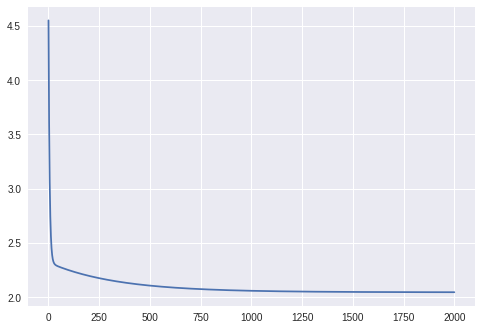

In [0]:
plt.plot(vw)   # 그래프 그리기

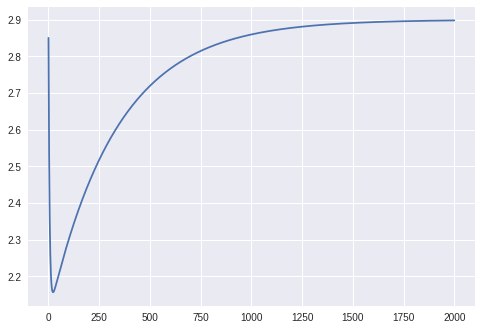

In [0]:
plt.plot(vb)

**Complete training**

In [0]:
w1 = sess.run(W)[0] # slope 끝났으니까 출력해보면 이런 직선그래프가 나온다.
b1 = sess.run(b)[0] # bias
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(w1, b1)
print(str1)

2.045685 2.897985
y = 2.045685x + 2.897985


Text(0.5, 1.0, 'y = 2.045685x + 2.897985')

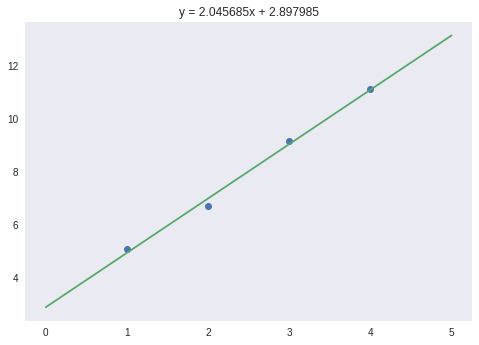

In [0]:
plt.figure(1) # 내가 적어놓은 점들을 동그랗게 그리는 부분.
plt.plot(x_train, y_train,'o')

x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1) #이부분은 지금은 잘 몰라도 되는데, 직선을 그리는 부분임 나중에 익숙해지면 보면됨 내가 학습한 w, b가지고 직선그리는 부분
y1 = w1*x1 + b1
plt.plot(x1, y1)
plt.grid() 
plt.title(str1) # 타이틀 찍어본거임

In [0]:
# 이제 w, b 값 정해주는 값을 바꿔보기도 하고 bias 를 바꿔 보기도 하자. 노이즈 말고 뒤에 바이어스 더 더하기